# Online Shopping Prediction 

Author: Shreyas Kambla  

Objective here is to analyze user activities and predict if the users will purchase the product or not, thus generating revenue for Online shopping

In [1]:

# Converting the Online shopping csv to dataframe 
import pandas as pd
import numpy as np

# Graphical representation of the features

import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import shap
import plotly.graph_objs as go

# Spliting up the dataframe to train,test,validation dataset
from sklearn.model_selection import train_test_split
import joblib

# Display result using ROC,AUC and Accuracy
from sklearn.metrics import confusion_matrix,accuracy_score,matthews_corrcoef,f1_score
from sklearn.metrics import classification_report,roc_curve,roc_auc_score

# Model selection using Grid search KerasClassfifer - Hyperparameter tuning 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold 
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import StandardScaler

# KNN libraries
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
from sklearn.neighbors import KNeighborsClassifier

# RandomForest libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectFromModel

# LogisticRegressor libraries
from sklearn.linear_model import LogisticRegression

#GradientBoostClassfier libraries
from sklearn.ensemble import GradientBoostingClassifier 

# Dense Neural Network libraries
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu, sigmoid
from keras.layers import LeakyReLU
from keras.callbacks import ModelCheckpoint


# Ignore the warning 
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [2]:
# Converting csv file into dataframe
my_path = %pwd
print(my_path)
df = pd.read_csv(f'{my_path}/online_shoppers_intention.csv')
print (df.shape)
df.head(13)

/Users/shruthiarun/Desktop/shreyasassginment/fall2019/fall2019/DS6105/project
(12330, 18)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


Administrative             0.0
Administrative_Duration    0.0
Informational              0.0
Informational_Duration     0.0
ProductRelated             0.0
ProductRelated_Duration    0.0
BounceRates                0.0
ExitRates                  0.0
PageValues                 0.0
SpecialDay                 0.0
Month                      0.0
OperatingSystems           0.0
Browser                    0.0
Region                     0.0
TrafficType                0.0
VisitorType                0.0
Weekend                    0.0
Revenue                    0.0
dtype: float64


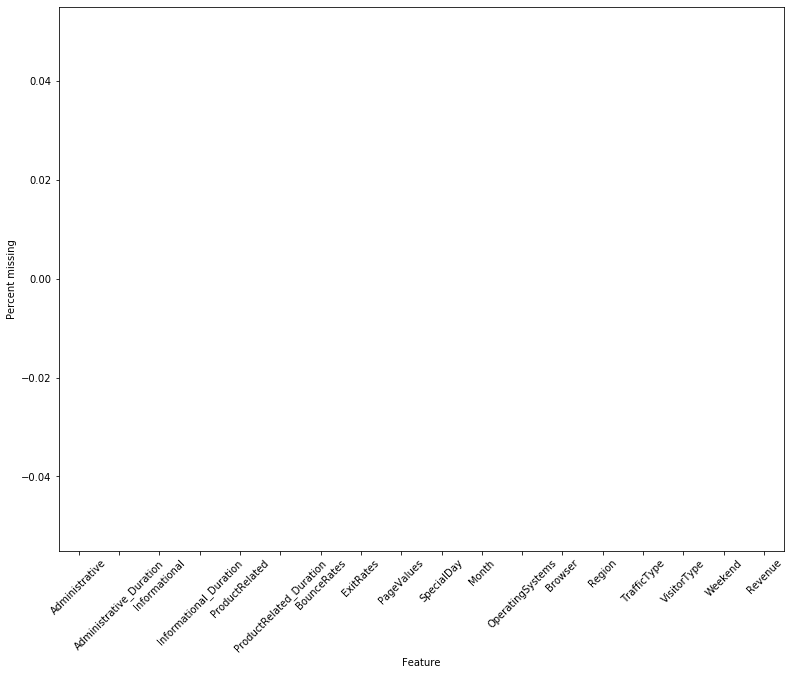

In [3]:
# Check if there is empty value

null_vals = df.isnull().sum()/len(df)*100
print (null_vals)
null_vals = pd.DataFrame(null_vals)
null_vals.reset_index(inplace = True)
null_vals.columns = ["Feature","Percent missing"]
plt.figure(figsize = (13,10))
plt.xticks(rotation=45)
sns.barplot(x = "Feature",y ="Percent missing",data = null_vals)

In [4]:
# Describe the data

df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [5]:
# Get the data type information about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

In [6]:
# Month and Visitor are in Object type converting into integers

month_Name_to_Number={'Jan':1,
 'Feb':2,
 'Mar':3,
 'April':4,
 'May':5,
 'June':6,
 'Jul':7,
 'Aug':8,
 'Sep':9,
 'Oct':10,
 'Nov':11,
 'Dec':12}

consumer_type={'New_Visitor':1,
 'Other':2,
 'Returning_Visitor':3}


df['VisitorType']=df['VisitorType'].map(consumer_type)
df['Month']=df['Month'].map(month_Name_to_Number)

In [7]:
# Converting Boolean data type to number

df['Revenue'] = df['Revenue'].astype(int)
df['Weekend'] = df['Weekend'].astype(int)

In [8]:
df.head(13)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,2,1,1,1,1,3,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,2,2,2,1,2,3,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,2,4,1,9,3,3,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,2,3,2,2,4,3,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,2,3,3,1,4,3,1,0
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,2,2,2,1,3,3,0,0
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,2,2,4,3,3,3,0,0
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,2,1,2,1,5,3,1,0
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,2,2,2,2,3,3,0,0
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,2,2,4,1,2,3,0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null int64
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null int64
Weekend                    12330 non-null int64
Revenue                    12330 non-null int64
dtypes: float

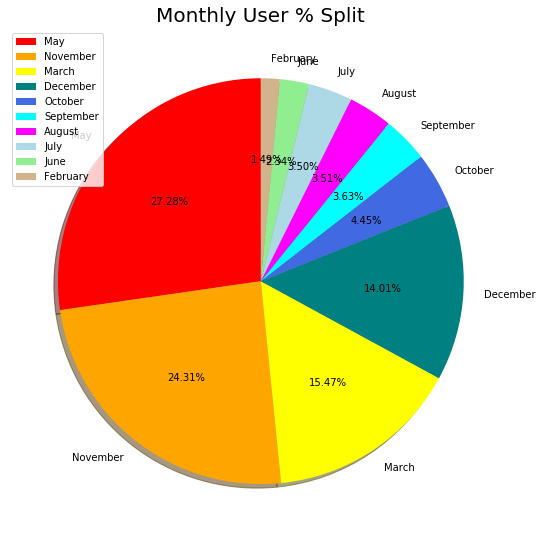

In [90]:
# plot the user for each month

plt.rcParams['figure.figsize'] = (20, 13)
size = [3364, 2998, 1907, 1727, 549, 448, 433, 432, 288, 184]
colors = ['red', 'orange', 'yellow', 'teal', 'royalblue', 'cyan', 'magenta', 'lightblue', 'lightgreen', 'tan']
labels = "May", "November", "March", "December", "October", "September", "August", "July", "June", "February"

plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%', startangle = 90)
plt.title('Monthly User % Split', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

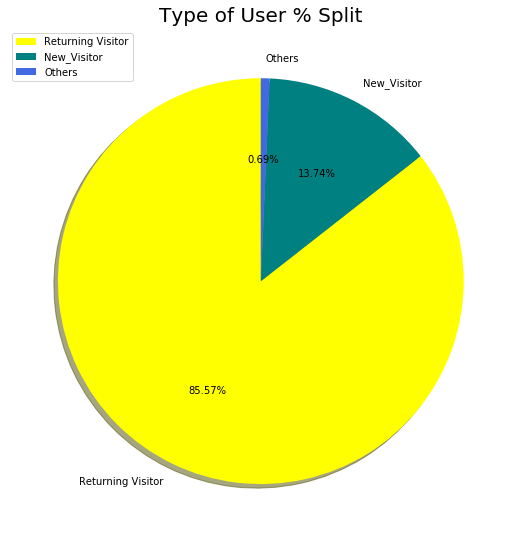

In [91]:
# Plot the type of users 

plt.rcParams['figure.figsize'] = (20, 13)
size = [10551, 1694, 85]
colors = ['yellow', 'teal', 'royalblue',]
labels = ["Returning Visitor", "New_Visitor", "Others"]
plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%', startangle = 90)
plt.title('Type of User % Split', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

Text(0, 0.5, 'Total Revenue')

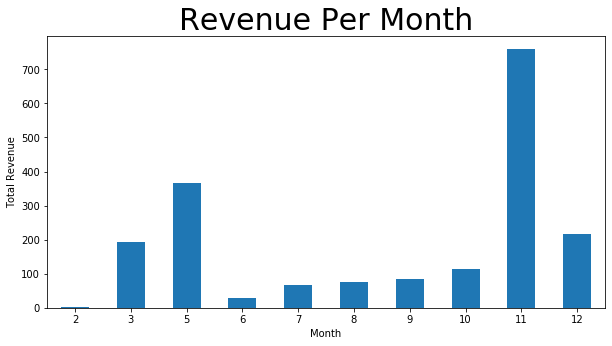

In [94]:
# revenue generated each month

monthly_revenue = df.groupby(['Month'])[['Revenue']].agg('sum')
graph = monthly_revenue.unstack().plot(kind='bar', figsize=(10,5))
plt.xticks(np.arange(10), sorted(df.Month.unique()), rotation=0)
graph.set_xlabel('Month')
plt.title('Revenue Per Month', fontsize = 30)
graph.set_ylabel('Total Revenue')

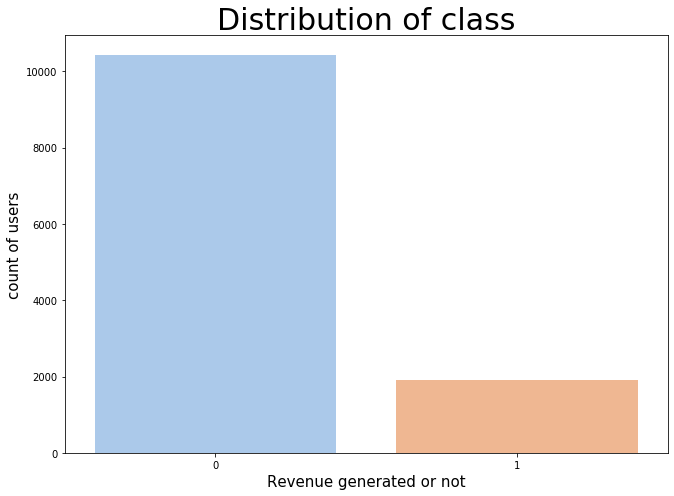

In [95]:
# what percentage of the users 

plt.rcParams['figure.figsize'] = (18, 7)
plt.subplot(1, 2, 1)
sns.countplot(df['Revenue'], palette = 'pastel')
plt.title('Distribution of class', fontsize = 30)
plt.xlabel('Revenue generated or not', fontsize = 15)
plt.ylabel('count of users', fontsize = 15)
plt.tight_layout()
plt.savefig('class_distri.png')

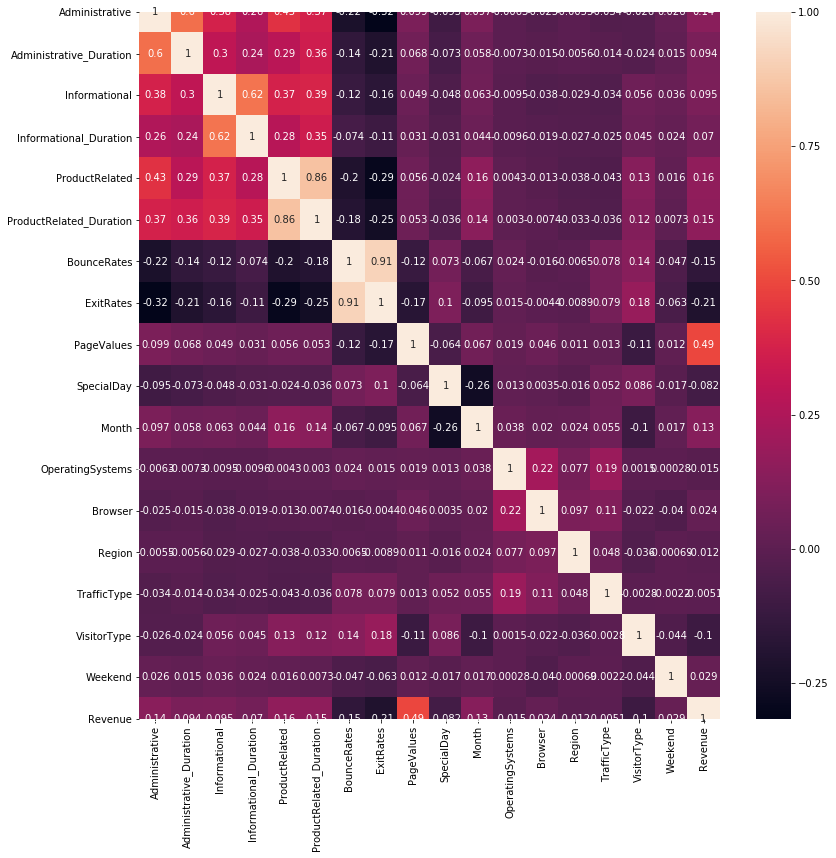

In [10]:
# Print the correlation between the feature which closely related to Revenue - PageValue

plt.figure(figsize=(13,13))
sns.heatmap(df.corr(),xticklabels=df.corr().columns,yticklabels=df.corr().columns,annot=True)

In [11]:
# Spliting the data train, validation and test data set
df_train_valid,df_test = train_test_split(df, test_size = 0.3,shuffle=False)
df_train,df_valid = train_test_split(df_train_valid, test_size = 0.3,shuffle=False)

In [12]:
'''
Setting input and output values 
X will be all the columns except Survived 
Y will be  just Revenue column
'''
Y_train = df_train["Revenue"]
X_train = df_train.drop(["Revenue"],axis = 1)
Y_valid = df_valid["Revenue"]
X_valid = df_valid.drop(["Revenue"],axis = 1)
Y_test = df_test["Revenue"]
X_test = df_test.drop(["Revenue"],axis = 1)
print(X_train.shape,Y_train.shape,X_valid.shape,Y_valid.shape,X_test.shape,Y_test.shape)

(6041, 17) (6041,) (2590, 17) (2590,) (3699, 17) (3699,)


In [13]:
# Result of the model
def results(Y_test, Y_pred):
    print('Accuracy : ', accuracy_score(Y_test, Y_pred)*100)
    print(classification_report(Y_test, Y_pred)) 
    cmatrix = confusion_matrix(Y_test,Y_pred)
    df_matrix = pd.DataFrame(cmatrix)
    plt.figure(figsize = (8,8))
    sns.heatmap(df_matrix, xticklabels = ["No Revenue","Revenue"],yticklabels = ["No Revenue","Revenue"],annot = True)

# KNN Alogrithm 

Text(0.5, 0, 'Neighbours')

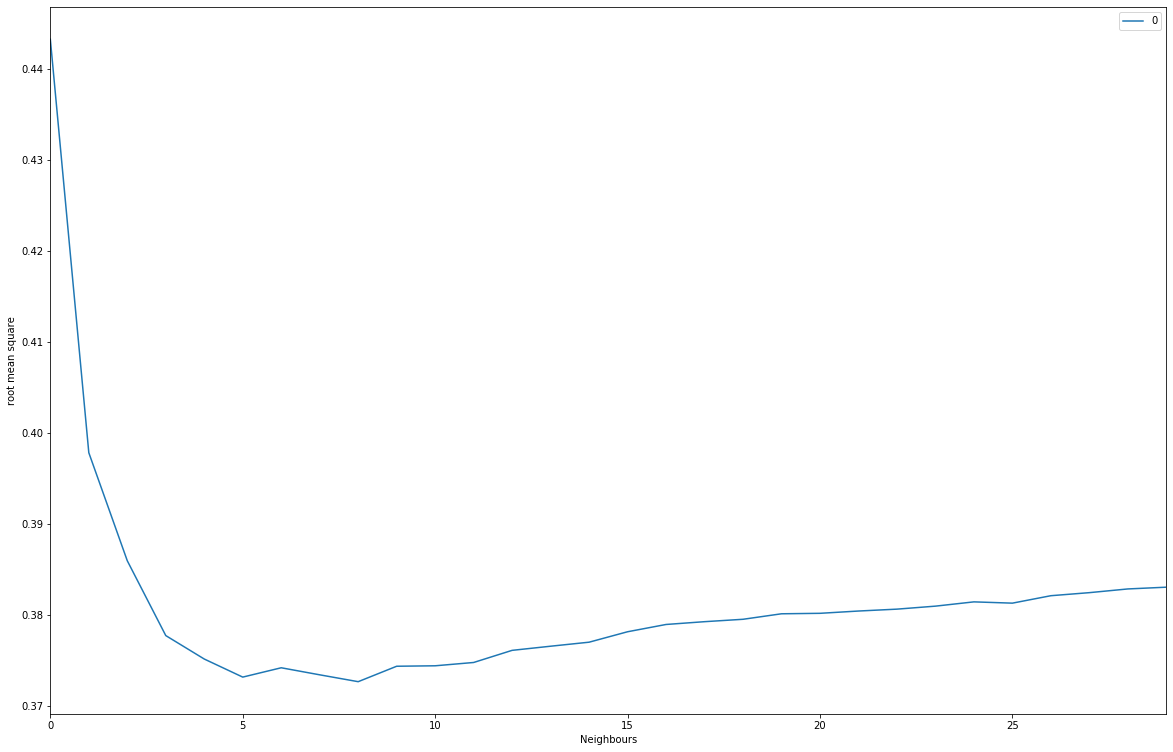

In [85]:
# Find the best neighbours and plot the elbow 
rmse = [] #to store rmse values for different k
for K in range(30):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train, Y_train)  #fit the model
    pred=model.predict(X_valid) #make prediction on validation set
    error = sqrt(mean_squared_error(Y_valid,pred)) #calculate rmse
    rmse.append(error) #store rmse values
curve = pd.DataFrame(rmse) #elbow curve 
curve.plot()
plt.ylabel('root mean square')
plt.xlabel('Neighbours')

In [15]:
# KNN Hyperparameter tuning

neigh_list = list()
accuracy_list = list()
algo_list = list()
weights_list = list()

algorithm = ['auto','ball_tree','kd_tree','brute']
weight = ['uniform','distance']


for neighbor in range(1,30):
    for a in algorithm:
        for w in weight:
            my_knn_model = KNeighborsClassifier(n_neighbors = neighbor,weights = w)
            my_knn_model.fit(X_train,Y_train)
            Y_pred = my_knn_model.predict(X_valid)
            accuracy = accuracy_score(Y_valid,Y_pred)
            neigh_list.append(neighbor)
            weights_list.append(w)
            algo_list.append(a)
            accuracy_list.append(accuracy)

df_hyper =  pd.DataFrame({"Neighbors": neigh_list,"Accuracy": accuracy_list,"Weight":weights_list,"Algorithm":algo_list})
df_hyper[df_hyper["Accuracy"] == df_hyper["Accuracy"].max()]

,Neighbors,Accuracy,Weight,Algorithm
48,7,0.833205,uniform,auto
50,7,0.833205,uniform,ball_tree
52,7,0.833205,uniform,kd_tree
54,7,0.833205,uniform,brute
65,9,0.833205,distance,auto
67,9,0.833205,distance,ball_tree
69,9,0.833205,distance,kd_tree
71,9,0.833205,distance,brute


In [16]:
# Saving classifier in file
# Based on graph neighbour value is set to 7 and weight is set to distance least neighbours


knn_model_fin = KNeighborsClassifier(n_neighbors = 7,weights = 'uniform',algorithm='auto')
knn_model_fin.fit(X_train,Y_train)

!mkdir knn_model
knn_model_name = f'{my_path}/knn_model/knn_model_final.sav'
joblib.dump(knn_model_fin,knn_model_name)

mkdir: knn_model: File exists


['/Users/shruthiarun/Desktop/shreyasassginment/fall2019/fall2019/DS6105/project/knn_model/knn_model_final.sav']

In [17]:
# Loading the classifier to run it using test dataset
kNN_loaded = joblib.load(f'{my_path}/knn_model/knn_model_final.sav')

In [18]:
# Predict the test output
Y_pred_knn = kNN_loaded.predict(X_test)

Accuracy :  82.10327115436604
              precision    recall  f1-score   support

           0       0.82      0.99      0.90      2954
           1       0.78      0.15      0.26       745

    accuracy                           0.82      3699
   macro avg       0.80      0.57      0.58      3699
weighted avg       0.81      0.82      0.77      3699



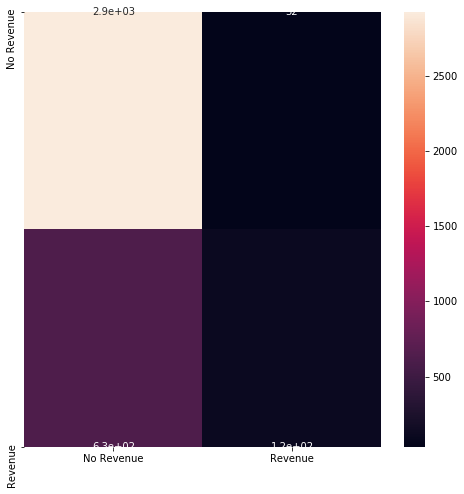

In [19]:
# evaluate the result
results(Y_test,Y_pred_knn)

# Random Forest


In [71]:
# model selection and hyper parameter tuning

model_random = RandomForestClassifier()

n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

parameters = dict(n_estimators = n_estimators, 
                  max_depth = max_depth,
                  min_samples_split = min_samples_split,
                  min_samples_leaf = min_samples_leaf)

grid_random = GridSearchCV(model_random,
                           parameters,
                           cv = 3,
                           verbose = 1,
                           n_jobs = -1)

model_random_grid = grid_random.fit(X_train, Y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   54.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 24.1min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 29.4min finished


In [74]:
# Get the best esitmator of hyper parameter
model_random_grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=15, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

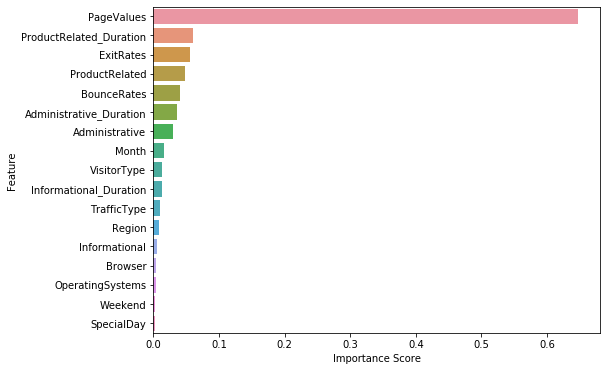

In [75]:
# Calculate the feature important score 
model_best_random=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

model_best_random.fit(X_train, Y_train)

# feature selection
feat_imps = pd.DataFrame(model_best_random.feature_importances_, index = X_train.columns,
                                    columns=['Importance score']).sort_values('Importance score',ascending=False)
feat_imps = feat_imps.reset_index()
feat_imps.columns = ["Feature","Importance Score"]
plt.figure(figsize = (8,6))
sns.barplot(x = "Importance Score",y = "Feature",data = feat_imps,orient = "h")

In [76]:
# Feature ranking and feature elimination
model_best_random_feature= RFECV(model_best_random, step=1, cv=10, scoring='accuracy')
model_best_random_feature.fit(X_train, Y_train)
model_best_random_feature.grid_scores_

array([0.92085949, 0.93079436, 0.93691883, 0.93857446, 0.89114988,
       0.89628974, 0.9292914 , 0.91104845, 0.90258937, 0.91071267,
       0.92166233, 0.91784642, 0.9180139 , 0.91851498, 0.92597931,
       0.91453049, 0.91420293])

In [77]:
# best feature number
model_best_random_feature.n_features_

4

In [78]:
# best feature list
list(X_train.columns[model_best_random_feature.support_])

['ProductRelated', 'ProductRelated_Duration', 'ExitRates', 'PageValues']

In [79]:
# Adapt the dataset to best feature list
X_train_random = X_train[['ProductRelated', 'ProductRelated_Duration','ExitRates', 'PageValues']]
X_valid_random = X_valid[['ProductRelated','ProductRelated_Duration',  'ExitRates', 'PageValues']]
X_test_random = X_test[['ProductRelated', 'ProductRelated_Duration','ExitRates', 'PageValues']]


model_best_random.fit(X_train_random,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Accuracy :  85.86872586872587
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      2089
           1       0.70      0.47      0.56       501

    accuracy                           0.86      2590
   macro avg       0.79      0.71      0.74      2590
weighted avg       0.85      0.86      0.85      2590



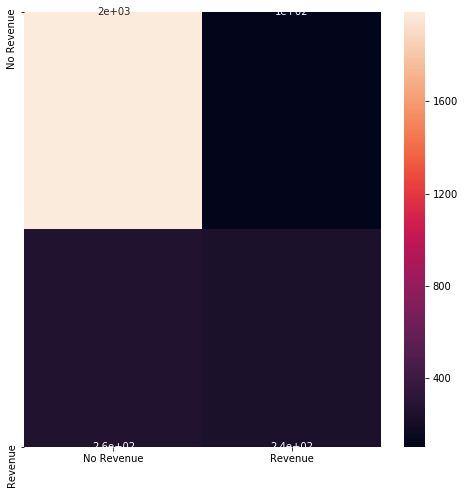

In [80]:
# calculate the accuracy for the validation set 
Y_valid_pred_random=model_best_random.predict(X_valid_random)
results(Y_valid,Y_valid_pred_random)

Accuracy :  84.5904298459043
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      2954
           1       0.76      0.34      0.47       745

    accuracy                           0.85      3699
   macro avg       0.81      0.66      0.69      3699
weighted avg       0.84      0.85      0.82      3699



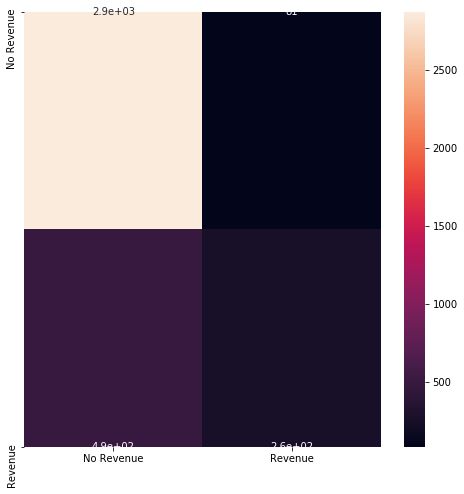

In [81]:
# calculate the accuracy for the test set
Y_pred_random=model_best_random.predict(X_test_random)
results(Y_test,Y_pred_random)

# GradientBoostingClassifier

In [29]:
# model selection and hyper parameter tuning

model_grad_tune = GradientBoostingClassifier()
tune_grid = {'n_estimators' : [100,200,400,500],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [2,4, 8],
              'min_samples_leaf': [10,100],
              }

kfold = KFold(n_splits=15, random_state=20)
model_best = GridSearchCV(model_grad_tune,param_grid = tune_grid, cv=kfold, scoring="accuracy", n_jobs= 20, verbose = 1)

model_best.fit(X_train,Y_train)

Fitting 15 folds for each of 72 candidates, totalling 1080 fits


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:   14.8s
[Parallel(n_jobs=20)]: Done 160 tasks      | elapsed:  1.7min
[Parallel(n_jobs=20)]: Done 410 tasks      | elapsed:  6.4min
[Parallel(n_jobs=20)]: Done 760 tasks      | elapsed: 12.1min
[Parallel(n_jobs=20)]: Done 1080 out of 1080 | elapsed: 18.0min finished


GridSearchCV(cv=KFold(n_splits=15, random_state=20, shuffle=False),
             error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weig...
                                                  n_iter_no_change=None,
                                                  presort='auto',
                

Accuracy :  86.37065637065638
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      2089
           1       0.72      0.49      0.58       501

    accuracy                           0.86      2590
   macro avg       0.80      0.72      0.75      2590
weighted avg       0.85      0.86      0.85      2590



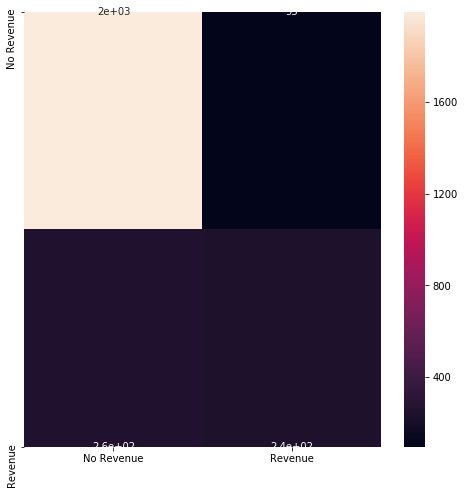

In [72]:
# validating the accuracy for the validation data set 
Y_valid_pred_grad=model_best.predict(X_valid)
results(Y_valid,Y_valid_pred_grad)

Accuracy :  84.75263584752636
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      2954
           1       0.77      0.35      0.48       745

    accuracy                           0.85      3699
   macro avg       0.81      0.66      0.70      3699
weighted avg       0.84      0.85      0.82      3699



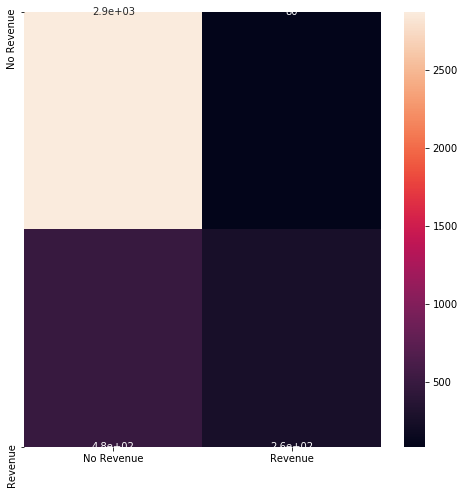

In [73]:
# calculating the accuracy for the test data set 
Y_pred_grad=model_best.predict(X_test)
results(Y_test,Y_pred_grad)

# Logistic Regression

In [32]:
# fitting the model for logisticregression

model_logic = LogisticRegression()
model_logic.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy :  86.02316602316603
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2089
           1       0.75      0.42      0.54       501

    accuracy                           0.86      2590
   macro avg       0.81      0.69      0.73      2590
weighted avg       0.85      0.86      0.84      2590



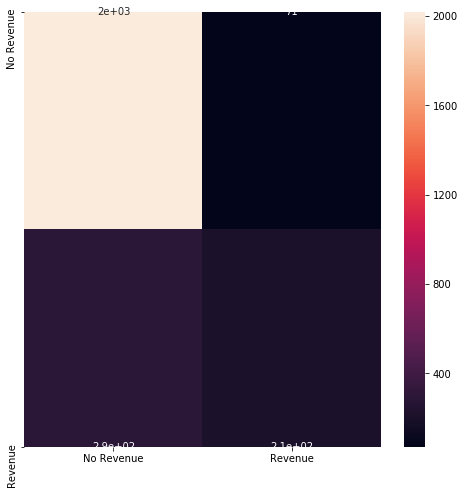

In [33]:
# validating the accuracy for the validation data set 
Y_valid_pred_logic=model_logic.predict(X_valid)
results(Y_valid,Y_valid_pred_logic)

Accuracy :  83.91457150581239
              precision    recall  f1-score   support

           0       0.85      0.96      0.91      2954
           1       0.70      0.35      0.46       745

    accuracy                           0.84      3699
   macro avg       0.78      0.65      0.68      3699
weighted avg       0.82      0.84      0.82      3699



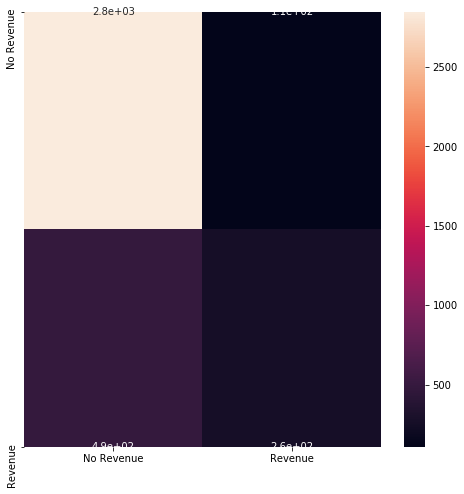

In [34]:
# calculating the accuracy for the test data set 
Y_pred_logic=model_logic.predict(X_test)
results(Y_test,Y_pred_logic)

# Dense neural network

In [35]:
'''
Build DNN model with train data, tune hyper-parameters with validation data, and finally evaluate performance on the test data. 
Creating a function to evaluate best hyperparameters
this function will take input as 
1. layer
2. activation
'''

def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=X_train.shape[1]))
            model.add(Activation(activation))            
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
            
    model.add(Dense(units = 1, kernel_initializer= 'uniform', activation = 'sigmoid')) # Note: no activation beyond this point
    
    model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
    return model
    
model_dnn = KerasClassifier(build_fn=create_model, verbose=0)

In [36]:
layers = [[40,20,10],[25,20,15,10,5]]
activations = ['sigmoid', 'relu']
param_grid = dict(layers=layers, activation=activations, batch_size = [10], epochs=[50])
grid_dnn= GridSearchCV(estimator=model_dnn, param_grid=param_grid,cv=5)

In [37]:
'''
grid result based on training set 
'''
grid_dnn_result = grid_dnn.fit(X_train, Y_train)

In [38]:
df_grid= pd.DataFrame.from_dict(grid_dnn_result.cv_results_)

In [39]:
'''
display data frame
'''
df_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_batch_size,param_epochs,param_layers,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,38.517008,0.469039,0.164291,0.011168,sigmoid,10,50,"[40, 20, 10]","{'activation': 'sigmoid', 'batch_size': 10, 'e...",0.949545,0.932947,0.942053,0.941225,0.897351,0.932627,0.018404,1
1,46.037593,1.040443,0.169806,0.009104,sigmoid,10,50,"[25, 20, 15, 10, 5]","{'activation': 'sigmoid', 'batch_size': 10, 'e...",0.951199,0.924669,0.934603,0.944536,0.902318,0.931468,0.017123,2
2,38.824599,0.865897,0.147522,0.006098,relu,10,50,"[40, 20, 10]","{'activation': 'relu', 'batch_size': 10, 'epoc...",0.945409,0.937086,0.928808,0.938742,0.903974,0.930806,0.014420,4
3,64.535693,37.635558,0.165574,0.010142,relu,10,50,"[25, 20, 15, 10, 5]","{'activation': 'relu', 'batch_size': 10, 'epoc...",0.952854,0.936258,0.941225,0.923013,0.903146,0.931303,0.017024,3


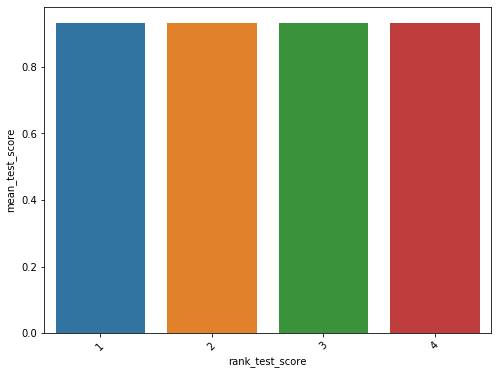

In [40]:
'''
ploting the dataframe based on accuracy

'''
plt.figure(figsize = (8,6))
plt.xticks(rotation=45)
sns.barplot(x = "rank_test_score",y ="mean_test_score",data = df_grid)

In [41]:
'''
 Build the deep neural network  based on above hypermeters to show training loss vs validation loss 
 and its accuracy 
 (c) Make Epoch versus train set accuracy, and validation set accuracy 

'''
model = Sequential()
model.add(Dense(40, input_dim=17, init='uniform', activation='sigmoid'))
model.add(Dense(20, init='uniform', activation='sigmoid'))
model.add(Dense(10, init='uniform', activation='sigmoid'))
model.add(Dense(1, init='uniform', activation='sigmoid'))
# Compile the DNN

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history=model.fit(X_train, Y_train, validation_data=(X_valid, Y_valid), nb_epoch=50, batch_size=10)

Train on 6041 samples, validate on 2590 samples
Epoch 1/50
6041/6041 [==============================] - 2s 255us/step - loss: 0.3881 - accuracy: 0.8904 - val_loss: 0.5164 - val_accuracy: 0.8066
Epoch 2/50
6041/6041 [==============================] - 1s 232us/step - loss: 0.3052 - accuracy: 0.8904 - val_loss: 0.4799 - val_accuracy: 0.8066
Epoch 3/50
6041/6041 [==============================] - 2s 276us/step - loss: 0.2611 - accuracy: 0.8904 - val_loss: 0.4598 - val_accuracy: 0.8066
Epoch 4/50
6041/6041 [==============================] - 2s 264us/step - loss: 0.2397 - accuracy: 0.8904 - val_loss: 0.4252 - val_accuracy: 0.8066
Epoch 5/50
6041/6041 [==============================] - 1s 215us/step - loss: 0.2206 - accuracy: 0.8904 - val_loss: 0.4264 - val_accuracy: 0.8066
Epoch 6/50
6041/6041 [==============================] - 1s 216us/step - loss: 0.2047 - accuracy: 0.8904 - val_loss: 0.4234 - val_accuracy: 0.8066
Epoch 7/50
6041/6041 [==============================] - 1s 231us/step - loss

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


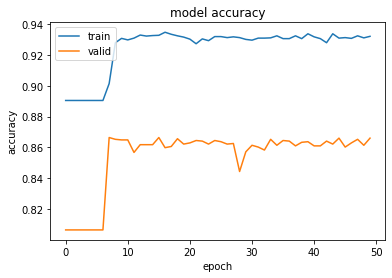

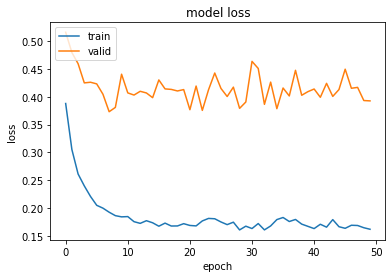

In [42]:
'''
Ploting the accuracy and loss for train and validation

'''
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

Accuracy :  83.91457150581239
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      2954
           1       0.74      0.31      0.44       745

    accuracy                           0.84      3699
   macro avg       0.79      0.64      0.67      3699
weighted avg       0.83      0.84      0.81      3699



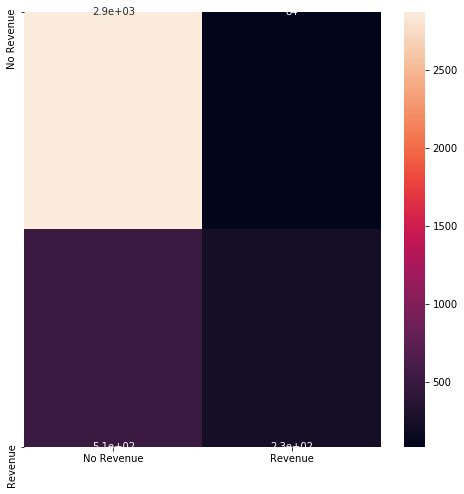

In [55]:
Y_pred_dnn=model.predict(X_test)
results(Y_test,Y_pred_dnn.round())

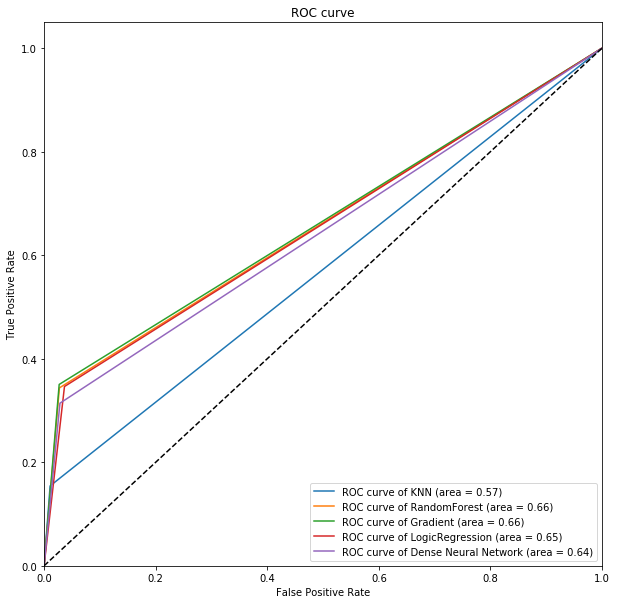

In [86]:
### plot the AUC curve
from sklearn.metrics import auc

plt.figure(figsize=(10,10))
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr[0],tpr[0],thresholds = roc_curve(Y_test,Y_pred_knn)
roc_auc[0] = auc(fpr[0], tpr[0])
plt.plot(fpr[0], tpr[0], label='ROC curve of KNN (area = {1:0.2f})'''.format(0, roc_auc[0]))

fpr[1],tpr[1],thresholds = roc_curve(Y_test,Y_pred_random)
roc_auc[1] = auc(fpr[1], tpr[1])
plt.plot(fpr[1], tpr[1], label='ROC curve of RandomForest (area = {1:0.2f})'''.format(1, roc_auc[1]))

fpr[2],tpr[2],thresholds = roc_curve(Y_test,Y_pred_grad)
roc_auc[2] = auc(fpr[2], tpr[2])
plt.plot(fpr[2], tpr[2], label='ROC curve of Gradient (area = {1:0.2f})'''.format(2, roc_auc[2]))

fpr[3],tpr[3],thresholds = roc_curve(Y_test,Y_pred_logic)
roc_auc[3] = auc(fpr[3], tpr[3])
plt.plot(fpr[3], tpr[3], label='ROC curve of LogicRegression (area = {1:0.2f})'''.format(3, roc_auc[3]))

fpr[4],tpr[4],thresholds = roc_curve(Y_test,Y_pred_dnn.round())
roc_auc[4] = auc(fpr[4], tpr[4])
plt.plot(fpr[4], tpr[4], label='ROC curve of Dense Neural Network (area = {1:0.2f})'''.format(4, roc_auc[4]))



plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

Refernce: 
        https://www.kaggle.com/roshansharma/online-shopper-s-intention
        https://scikit-learn.org/0.15/auto_examples/plot_roc.html
        https://www.degruyter.com/downloadpdf/j/jaiscr.2018.8.issue-1/jaiscr-2018-0002/jaiscr-2018-0002.pdf 
        https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/ 
        https://stats.stackexchange.com/questions/18891/bagging-boosting-and-stacking-in-machine-learning
        https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
        https://github.com/krishnaik06/Hidden-Layers-Neurons/blob/master/Hyperparameter.py    